Percentage of loan paid for all accounts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data
accounts = pd.read_csv("../Resources/accounts.csv")
# ast = pd.read_csv("../Resources/account_state_transitions.csv")
groups = pd.read_csv("../Resources/groups.csv")
payments = pd.read_csv("../Resources/payments.csv")
# gpa = pd.read_csv("../Resources/group_product_associations.csv")

In [3]:
# Sum payment amounts
payments_ct = payments.groupby('account_id', as_index=False)['amount'].sum()

# Rename column
payments_ct = payments_ct.rename(columns={'id':'num_payments'})

In [4]:
# Limit columns in accounts dataframe
accounts = accounts[['id','group_id','is_written_off','is_unlocked']]

In [5]:
# Merge payments and accounts dataframe
merged_df = pd.merge(left=payments_ct,right=accounts,how='inner',left_on='account_id',right_on='id')

In [6]:
# Drop column
merged_df = merged_df.drop(columns=['id'])

In [7]:
# Merge with groups dataframe
merged_df = pd.merge(left=merged_df,right=groups,how='inner',left_on='group_id',right_on='id')

In [8]:
# Limit columns
merged_df = merged_df[['account_id','is_written_off','is_unlocked','amount','price_unlock']]

In [9]:
# Rename column
merged_df = merged_df.rename(columns={'amount':'amount_paid'})

# Add column
merged_df['pct_paid'] = round((merged_df['amount_paid']/merged_df['price_unlock']) * 100,2)

In [10]:
merged_df.head()

,account_id,is_written_off,is_unlocked,amount_paid,price_unlock,pct_paid
0,1,False,False,1900,8100,23.46
1,2,False,True,8100,8100,100.00
2,3,False,False,7661,8100,94.58
3,4,False,True,8100,8100,100.00
4,5,False,False,6743,8100,83.25


Visualize data

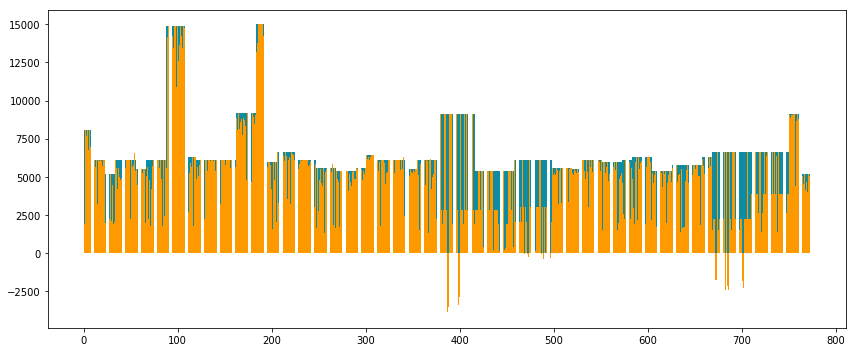

In [40]:
x = merged_df['account_id']
y1 = merged_df['price_unlock']
y2 = merged_df['amount_paid']

plt.figure(figsize=(12,5))
plt.bar(x,y1,color="#0e8ca4")
plt.bar(x,y2,color="#ff9900")
plt.tight_layout()
plt.show()